# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
index = 0
counter = 1
# For each cities in cities list, get data
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        weather_date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index > 49:
            index = 0
            counter = counter + 1
    
        else:
            index = index + 1
            
        print(f"Processing Record {index} of Set {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 2 of Set 1 : erzin
Processing Record 3 of Set 1 : hermanus
Processing Record 4 of Set 1 : san cristobal
Processing Record 5 of Set 1 : chokurdakh
Processing Record 6 of Set 1 : mataura
Processing Record 7 of Set 1 : sampit
Processing Record 8 of Set 1 : ust-nera
Processing Record 9 of Set 1 : malpe
Processing Record 10 of Set 1 : butaritari
Processing Record 11 of Set 1 : jaguey grande
City not found. Skipping...
Processing Record 13 of Set 1 : kahului
Processing Record 14 of Set 1 : hirara
Processing Record 15 of Set 1 : sao domingos
Processing Record 16 of Set 1 : vaini
Processing Record 17 of Set 1 : bredasdorp
City not found. Skipping...
Processing Record 19 of Set 1 : la ronge
Processing Record 20 of Set 1 : provideniya
Processing Record 21 of Set 1 : kapaa
Processing Record 22 of Set 1 : cayenne
Processing Record 23 of Set 1 : solnechnyy
Processing Record 24 of Set 1 : busselton
Processing Record 25 of Set 1 : atuona
Processing Record 26 of Set 1 : grand gaube
P

Processing Record 0 of Set 148 : pangnirtung
Processing Record 0 of Set 149 : arman
Processing Record 0 of Set 150 : georgetown
Processing Record 0 of Set 151 : leh
Processing Record 0 of Set 152 : borca
Processing Record 0 of Set 153 : souillac
Processing Record 0 of Set 154 : jinxiang
Processing Record 0 of Set 155 : never
Processing Record 0 of Set 156 : cherskiy
Processing Record 0 of Set 157 : yulara
Processing Record 0 of Set 158 : buzmeyin
Processing Record 0 of Set 159 : mbanza-ngungu
Processing Record 0 of Set 160 : esperance
Processing Record 0 of Set 161 : kudahuvadhoo
Processing Record 0 of Set 162 : taltal
Processing Record 0 of Set 163 : mahajanga
Processing Record 0 of Set 164 : paamiut
Processing Record 0 of Set 165 : olga
Processing Record 0 of Set 166 : mana
Processing Record 0 of Set 167 : oktyabrskoye
City not found. Skipping...
Processing Record 0 of Set 168 : tasiilaq
Processing Record 0 of Set 169 : klaksvik
Processing Record 0 of Set 170 : beya
City not found. S

Processing Record 0 of Set 332 : datong
Processing Record 0 of Set 333 : lorca
Processing Record 0 of Set 334 : tilichiki
Processing Record 0 of Set 335 : prince george
Processing Record 0 of Set 336 : bonavista
Processing Record 0 of Set 337 : acapulco
Processing Record 0 of Set 338 : monze
Processing Record 0 of Set 339 : guarda
Processing Record 0 of Set 340 : longyearbyen
Processing Record 0 of Set 341 : cidreira
Processing Record 0 of Set 342 : bandar-e lengeh
Processing Record 0 of Set 343 : iqaluit
Processing Record 0 of Set 344 : vila
Processing Record 0 of Set 345 : radford
Processing Record 0 of Set 346 : dok kham tai
Processing Record 0 of Set 347 : marystown
Processing Record 0 of Set 348 : morehead
Processing Record 0 of Set 349 : umtata
Processing Record 0 of Set 350 : rajur
Processing Record 0 of Set 351 : miri
Processing Record 0 of Set 352 : komyshnya
City not found. Skipping...
Processing Record 0 of Set 353 : salta
Processing Record 0 of Set 354 : kruisfontein
City n

Processing Record 0 of Set 512 : fukuma
Processing Record 0 of Set 513 : dogondoutchi
Processing Record 0 of Set 514 : shiraz
Processing Record 0 of Set 515 : mitsamiouli
Processing Record 0 of Set 516 : tadine
Processing Record 0 of Set 517 : raga
Processing Record 0 of Set 518 : angoche
Processing Record 0 of Set 519 : cairns
Processing Record 0 of Set 520 : sao felix do xingu
Processing Record 0 of Set 521 : saint-joseph
Processing Record 0 of Set 522 : funadhoo
Processing Record 0 of Set 523 : ponta delgada
Processing Record 0 of Set 524 : sept-iles
Processing Record 0 of Set 525 : fare
City not found. Skipping...
Processing Record 0 of Set 526 : hobyo
Processing Record 0 of Set 527 : presidencia roque saenz pena
Processing Record 0 of Set 528 : dieppe
Processing Record 0 of Set 529 : mangai
Processing Record 0 of Set 530 : bamako
Processing Record 0 of Set 531 : yerbogachen
Processing Record 0 of Set 532 : cleveland
Processing Record 0 of Set 533 : santiago
City not found. Skippin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_df = pd.DataFrame({'City' : city_name,
                          'Country' : country ,
                          'Lat' : latitude , 
                          'Lng' : longitude ,
                          'Date' : weather_date ,
                          'Max Temp' : temp ,
                          'Humidity' : humidity ,
                          'Cloudiness' : cloudiness ,
                          'Wind Speed' : wind_speed })
weather_df.to_csv("../../output_data/cities.csv", index = False)

In [16]:
weather_df

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Erzin,TR,36.96,36.20,1607621387,59.00,64,0,4.50
1,Hermanus,ZA,-34.42,19.23,1607621476,66.99,78,15,1.01
2,San Cristobal,VE,7.77,-72.22,1607621476,84.20,70,40,11.41
3,Chokurdakh,RU,70.63,147.92,1607621476,-29.22,86,54,7.18
4,Mataura,NZ,-46.19,168.86,1607621477,44.01,93,100,5.01
...,...,...,...,...,...,...,...,...,...
585,Bam,IR,29.11,58.36,1607621578,48.13,63,94,6.42
586,Port Keats,AU,-14.25,129.55,1607621579,82.72,77,89,3.96
587,Morristown,US,36.21,-83.29,1607621549,53.60,62,1,3.60
588,Amapá,BR,1.00,-52.00,1607621579,92.57,42,28,7.02


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
weather_df['Humidity'].astype(float)
weather_sorted = weather_df.sort_values(by='Humidity', ascending=False)
weather_sorted
#Sorted shows none are above 100

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
589,Nampa,US,43.54,-116.56,1607621579,28.40,100,1,6.02
496,Vetlanda,SE,57.43,15.08,1607621563,33.80,100,100,8.05
17,Kapaa,US,22.08,-159.32,1607621479,71.60,100,90,10.29
439,Asău,RO,46.43,26.40,1607621552,33.80,100,75,3.36
396,Nova Odesa,UA,47.31,31.79,1607621545,37.40,100,90,15.66
...,...,...,...,...,...,...,...,...,...
293,San Juan,AR,-31.54,-68.54,1607621526,105.78,13,1,18.68
464,Gobabis,NA,-22.45,18.97,1607621557,87.03,13,0,4.45
432,Mount Isa,AU,-20.73,139.50,1607621442,86.00,13,97,12.75
260,General Pico,AR,-35.66,-63.76,1607621470,106.48,12,17,23.64


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

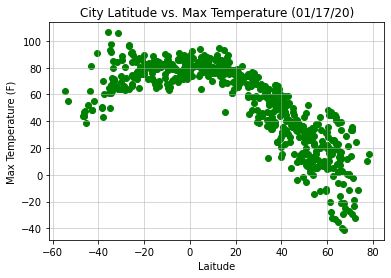

In [26]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "green")

# Set title
plt.title("City Latitude vs. Max Temperature (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

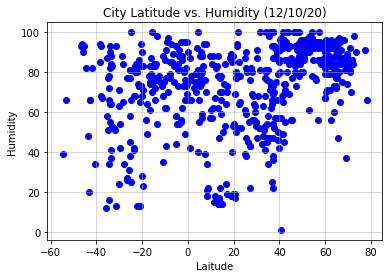

In [27]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue")

# Set title
plt.title("City Latitude vs. Humidity (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

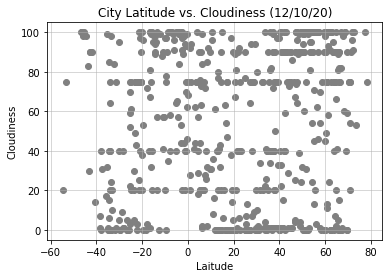

In [28]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "grey")

# Set title
plt.title("City Latitude vs. Cloudiness (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

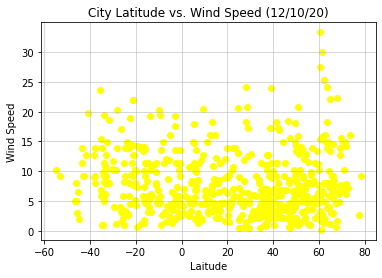

In [29]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "yellow")

# Set title
plt.title("City Latitude vs. Wind Speed (12/10/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression